# US testing notebook

This notebook includes testing for the functionality of reweight with PolicyEngine US.

In [10]:
import pandas as pd
import numpy as np
import torch
from torch.utils.tensorboard import SummaryWriter

In [11]:
from policyengine_us.data.datasets.cps.enhanced_cps.loss import generate_model_variables
(
    household_weights,
    weight_adjustment,
    values_df,
    targets,
    targets_array,
    equivalisation_factors_array
) = generate_model_variables("cps_2021", 2025)

In [12]:
from reweight import reweight

In [13]:
sim_matrix = torch.tensor(values_df.to_numpy(), dtype=torch.float32)
initial_weights = torch.tensor(household_weights, dtype=torch.float32)
targets_tensor = torch.tensor(targets_array, dtype=torch.float32)
final_weights = reweight(initial_weights, sim_matrix, targets, targets_tensor, epochs=20_000)

Epoch 100, Loss: 0.36243075132369995
Epoch 200, Loss: 0.3186039328575134
Epoch 300, Loss: 0.2849416434764862
Epoch 400, Loss: 0.2582869231700897
Epoch 500, Loss: 0.23667685687541962
Epoch 600, Loss: 0.21886183321475983
Epoch 700, Loss: 0.20400400459766388
Epoch 800, Loss: 0.191498264670372
Epoch 900, Loss: 0.18087948858737946
Epoch 1000, Loss: 0.17178186774253845
Epoch 1100, Loss: 0.16392028331756592
Epoch 1200, Loss: 0.15707238018512726
Epoch 1300, Loss: 0.15105725824832916
Epoch 1400, Loss: 0.1457177698612213
Epoch 1500, Loss: 0.14091533422470093
Epoch 1600, Loss: 0.1365375518798828
Epoch 1700, Loss: 0.13250517845153809
Epoch 1800, Loss: 0.1287708729505539
Epoch 1900, Loss: 0.1253127157688141
Epoch 2000, Loss: 0.12212549149990082
Epoch 2100, Loss: 0.11920974403619766
Epoch 2200, Loss: 0.11656445264816284
Epoch 2300, Loss: 0.11418792605400085
Epoch 2400, Loss: 0.11208438873291016
Epoch 2500, Loss: 0.11026504635810852
Epoch 2600, Loss: 0.10873664170503616
Epoch 2700, Loss: 0.1074862778

In [14]:
def nonzero_proportion(tensor):
    return torch.count_nonzero(tensor).item() / tensor.numel()

print(nonzero_proportion(initial_weights))

print(nonzero_proportion(final_weights))

1.0
1.0


In [15]:
import matplotlib.pyplot as plt

def plot_tensor_histogram(tensor, bins=30, title='Tensor Histogram'):
    # Flatten the tensor to 1D
    flattened = tensor.flatten()
    
    # Convert to numpy array for matplotlib
    data = flattened.numpy()
    
    # Create the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=bins, edgecolor='black')
    
    # Add labels and title
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(title)
    
    # Show the plot
    plt.show()

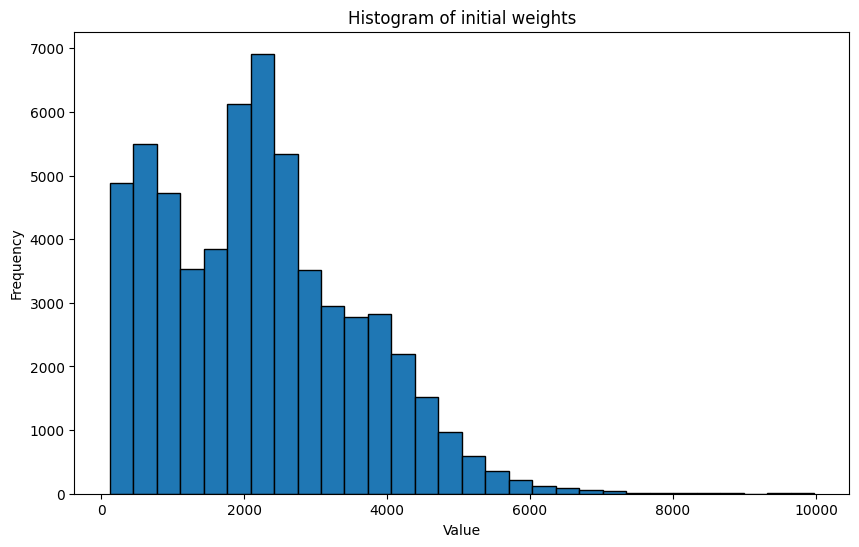

In [16]:
plot_tensor_histogram(initial_weights, title="Histogram of initial weights")

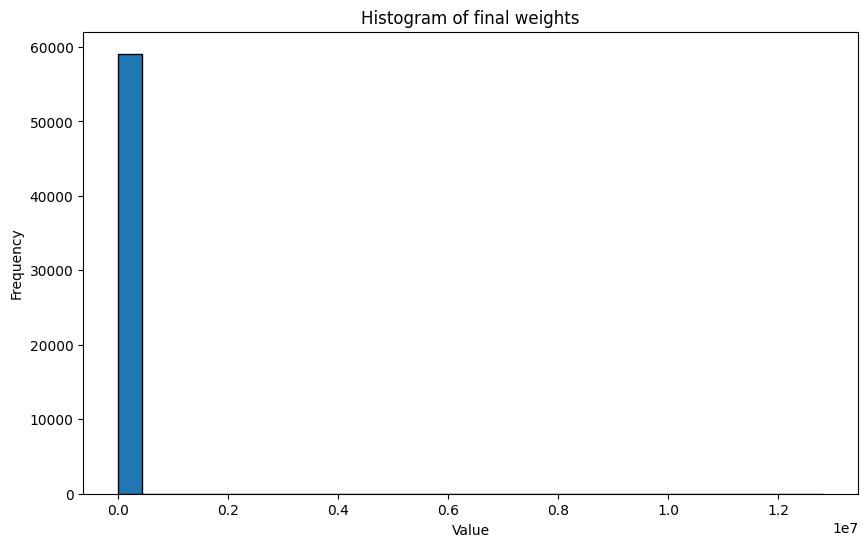

In [17]:
plot_tensor_histogram(final_weights, title="Histogram of final weights")




In [21]:
sorted, indices = torch.sort(final_weights)

In [29]:
sorted[59000:]

tensor([   25258.0684,    25407.7344,    25413.9629,    25835.3301,
           26067.8496,    26888.0469,    27137.9082,    27917.3145,
           28323.6504,    28423.9316,    28951.0898,    29583.4551,
           30200.3848,    30603.7090,    31561.3262,    31861.4805,
           32141.3359,    33583.5625,    34153.9961,    34683.2422,
           34928.6406,    36163.5742,    36456.6641,    37280.3711,
           37366.0117,    39494.7227,    42328.6016,    43394.8398,
           43796.0039,    43924.5820,    49096.6992,    50212.1250,
           51391.9414,    52099.1406,    54202.6992,    54883.8477,
           55095.4492,    55689.6914,    58922.7773,    59358.6992,
           60858.7969,    62577.3086,    63391.8008,    67386.8438,
           73030.6250,    73332.3984,    73727.3359,    77644.5234,
           78709.8281,    83914.5234,    88579.1797,    94242.5078,
           95326.5859,    97571.5625,   101230.7578,   103747.4688,
          104924.2734,   105521.9453,   110786.8